# Predicting the flow

### Multiple regression with decision tree
The model includes the historical value of the flow for a given hour and the value of the flow of one previous hour

### Importing necessary libraries

In [50]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import datetime as dt
import numpy as np
%matplotlib inline 

### Loading the data set

In [17]:
flow = pd.read_csv('../dataset/flow1.csv', parse_dates=['time'])
flow.head()

,time,flow
0,2015-06-01 14:15:00,115.559998
1,2015-06-01 14:20:00,115.199997
2,2015-06-01 14:25:00,112.209999
3,2015-06-01 14:30:00,112.860001
4,2015-06-01 14:35:00,113.349998


### Preparing the data 
Making the mean for each hour, reseting the index put on the time and leaving only integer representing the current hour

In [18]:
flow_h = pd.read_csv('../dataset/flow1.csv', parse_dates={'hour':['time']},index_col='hour')
dayfirst=True
flow_h = flow_h.resample('60T').mean()

In [19]:
flow_h = flow_h.reset_index()

In [20]:
flow_h['time'] = flow_h['hour']
flow_h.head()

,hour,flow,time
0,2015-06-01 14:00:00,113.754443,2015-06-01 14:00:00
1,2015-06-01 15:00:00,113.013333,2015-06-01 15:00:00
2,2015-06-01 16:00:00,114.081666,2015-06-01 16:00:00
3,2015-06-01 17:00:00,116.459167,2015-06-01 17:00:00
4,2015-06-01 18:00:00,123.825000,2015-06-01 18:00:00


In [21]:
flow_h['hour'] = (flow_h['hour'].dt.hour)

In [22]:
flow_h.head()

,hour,flow,time
0,14,113.754443,2015-06-01 14:00:00
1,15,113.013333,2015-06-01 15:00:00
2,16,114.081666,2015-06-01 16:00:00
3,17,116.459167,2015-06-01 17:00:00
4,18,123.825000,2015-06-01 18:00:00


### Adding the column with the value of previous hour

In [23]:
flow_h['previous-hour'] = flow_h['flow'].shift(1)

In [24]:
flow_h.head()

,hour,flow,time,previous-hour
0,14,113.754443,2015-06-01 14:00:00,NaN
1,15,113.013333,2015-06-01 15:00:00,113.754443
2,16,114.081666,2015-06-01 16:00:00,113.013333
3,17,116.459167,2015-06-01 17:00:00,114.081666
4,18,123.825000,2015-06-01 18:00:00,116.459167


### Splitting the data set into train and test sets

In [25]:
split_date = pd.datetime(2016,12,31,23,59)

flow_training = flow_h.loc[flow_h['time'] <= split_date]
flow_test = flow_h.loc[flow_h['time'] > split_date]

flow_training = flow_training.dropna()

In [26]:
flow_training.head()

,hour,flow,time,previous-hour
1,15,113.013333,2015-06-01 15:00:00,113.754443
2,16,114.081666,2015-06-01 16:00:00,113.013333
3,17,116.459167,2015-06-01 17:00:00,114.081666
4,18,123.825000,2015-06-01 18:00:00,116.459167
5,19,128.884998,2015-06-01 19:00:00,123.825000


In [27]:
flow_test.head()

,hour,flow,time,previous-hour
13906,0,94.330833,2017-01-01 00:00:00,99.808334
13907,1,91.927501,2017-01-01 01:00:00,94.330833
13908,2,90.722501,2017-01-01 02:00:00,91.927501
13909,3,87.402501,2017-01-01 03:00:00,90.722501
13910,4,81.485833,2017-01-01 04:00:00,87.402501


In [80]:
X_flow_training = flow_training[['hour','previous-hour']]

In [81]:
X_flow_test = flow_test[['hour','previous-hour']]

In [82]:
Y_flow_training = flow_training['flow'].values.reshape(-1,1)

In [83]:
Y_flow_test = flow_test['flow'].values.reshape(-1,1)

In [84]:
regressor2 = DecisionTreeRegressor(max_depth=2)
regressor2.fit(X_flow_training, Y_flow_training)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [85]:
regressor5 = DecisionTreeRegressor(max_depth=5)
regressor5.fit(X_flow_training, Y_flow_training)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Creating a multiple regression model with decision tree

In [91]:
predict2 = regressor2.predict(X_flow_test)
predict5 = regressor5.predict(X_flow_test)

### Plot for the model with depth=2 showing only the hour

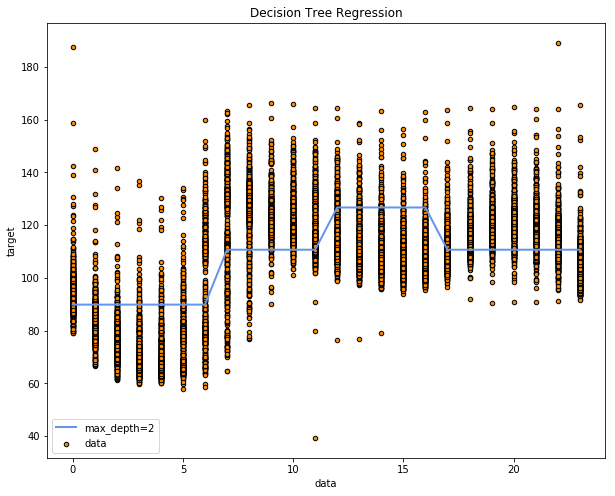

In [87]:
plt.figure(figsize=(10, 8))
plt.scatter(X_flow_training['hour'], Y_flow_training, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_flow_test['hour'][:24], predict2[:24], color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Plot for the model with depth=5 showing only the hour

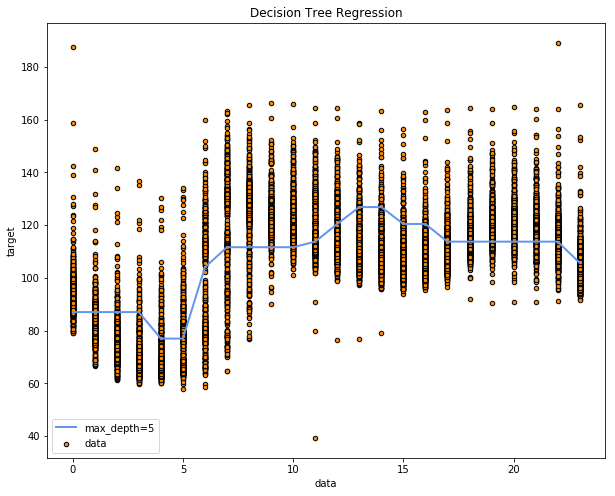

In [88]:
plt.figure(figsize=(10, 8))
plt.scatter(X_flow_training['hour'], Y_flow_training, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_flow_test['hour'][:24], predict5[:24], color="cornflowerblue",
         label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Plot showing multiple regression

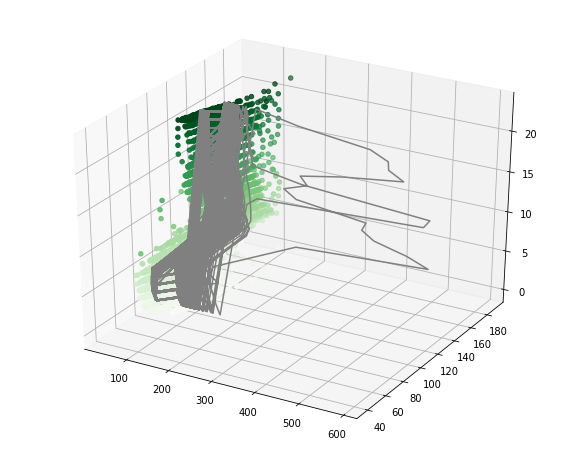

In [104]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

#line
zline = X_flow_test['hour']
xline = X_flow_test['previous-hour']
yline = predict2
ax.plot3D(xline, yline, zline, 'gray')

#scatter plot
zdata = X_flow_training['hour']
xdata = X_flow_training['previous-hour']
ydata = Y_flow_training
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

### Implementing metrics (mean absolute percentage error)

In [47]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### MAPE for depth=2

In [48]:
mape_2 = mean_absolute_percentage_error(Y_flow_test, predict2)
mape_2

21.51467429337076

### MAPE for depth=5

In [49]:
mape_5 = mean_absolute_percentage_error(Y_flow_test, predict5)
mape_5

22.766338132046695